# Echo Spectroscopy vs Drive Amplitude

Compare spectroscopy matrices with and without an echo pulse using a single, reproducible sweep.

In [1]:
from copy import deepcopy

import numpy as np
from matplotlib import pyplot as plt

from scriptos.spectroscopy_vs_amplitude import run_all
from simi.args import qubit_args as default_qubit_args, pi, MHz, T2_limit

BASE_SWEEP = {
    'rabi_points': 50,
    'rabi_frequency': 0.05 * 2 * pi * MHz,
    'pulse_length': 50e-6,
    'detuning_span': 0.1 * 2 * pi * MHz,
}


def run_sweep(*, eco_pulse: bool, cutoff: float):
    """Return detunings, amplitudes, and probability matrix for a sweep configuration."""
    args = deepcopy(default_qubit_args)
    args.update(BASE_SWEEP)
    args['eco_pulse'] = eco_pulse
    args['cutoff'] = cutoff
    return run_all(args)


T1: 30.00 us
T2: 15.00 us
T2 limit: 21.22 kHz
broadening condition:
14.142135623730953 kHz


Amplitude = 0/50
Amplitude = 1/50
Amplitude = 2/50
Amplitude = 3/50
Amplitude = 4/50
Amplitude = 5/50
Amplitude = 6/50
Amplitude = 7/50
Amplitude = 8/50
Amplitude = 9/50
Amplitude = 10/50
Amplitude = 11/50
Amplitude = 12/50
Amplitude = 13/50
Amplitude = 14/50
Amplitude = 15/50
Amplitude = 16/50
Amplitude = 17/50
Amplitude = 18/50
Amplitude = 19/50
Amplitude = 20/50
Amplitude = 21/50
Amplitude = 22/50
Amplitude = 23/50
Amplitude = 24/50
Amplitude = 25/50
Amplitude = 26/50
Amplitude = 27/50
Amplitude = 28/50
Amplitude = 29/50
Amplitude = 30/50
Amplitude = 31/50
Amplitude = 32/50
Amplitude = 33/50
Amplitude = 34/50
Amplitude = 35/50
Amplitude = 36/50
Amplitude = 37/50
Amplitude = 38/50
Amplitude = 39/50
Amplitude = 40/50
Amplitude = 41/50
Amplitude = 42/50
Amplitude = 43/50
Amplitude = 44/50
Amplitude = 45/50
Amplitude = 46/50
Amplitude = 47/50
Amplitude = 48/50
Amplitude = 49/50
Amplitude = 0/50
Amplitude = 1/50
Amplitude = 2/50
Amplitude = 3/50
Amplitude = 4/50
Amplitude = 5/50
Amplitud

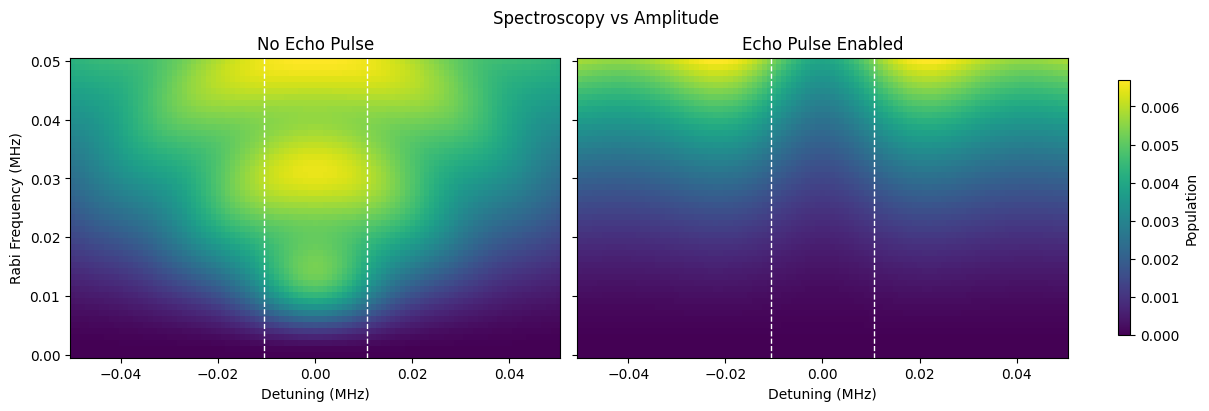

In [2]:
SCENARIOS = [
    ("No Echo Pulse", {"eco_pulse": False, "cutoff": 0.99999}),
    ("Echo Pulse Enabled", {"eco_pulse": True, "cutoff": 0.01}),
]

fig, axes = plt.subplots(1, len(SCENARIOS), figsize=(12, 4), sharey=True, constrained_layout=True)
axes = np.atleast_1d(axes)
mesh = None

for ax, (title, params) in zip(axes, SCENARIOS):
    detunings, amps, matrix = run_sweep(**params)
    mesh = ax.pcolormesh(detunings / 2 / pi / MHz, amps / 2 / pi / MHz, matrix, shading='auto')

    ax.axvline(T2_limit / MHz / 2, color='w', linestyle='--', linewidth=1)
    ax.axvline(-T2_limit / MHz / 2, color='w', linestyle='--', linewidth=1)

    ax.set_title(title)
    ax.set_xlabel('Detuning (MHz)')

axes[0].set_ylabel('Rabi Frequency (MHz)')
if mesh is not None:
    cbar = fig.colorbar(mesh, ax=axes, shrink=0.85)
    cbar.set_label('Population')

fig.suptitle('Spectroscopy vs Amplitude')
plt.show()
